In [1]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
iris = load_iris()
iris.data[0:5], iris.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [4]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
tpot.fit(X_train, y_train)


2.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(input_matrix, alpha=0.1, learning_rate_init=0.01)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x000001D5D998C308>,
               max_time_mins=2, verbosity=2)

In [5]:
print(tpot.score(X_train, y_train))
print(tpot.score(X_test, y_test))

1.0
0.9210526315789473


In [7]:
tpot.export('tpot_iris_pipeline.py')

In [7]:
predictions = tpot.predict(X_test)

In [8]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.9210526315789473


In [9]:
print(sklearn.metrics.confusion_matrix(y_test, predictions))

[[12  0  0]
 [ 0 11  2]
 [ 0  1 12]]


In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

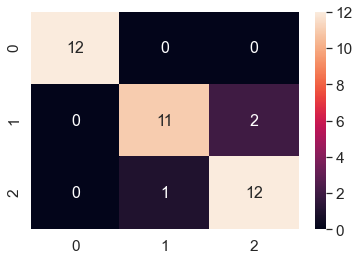

In [12]:
import pandas as pd
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()